# Dataset Understanding
#### The dataset is from Kaggel and you can see it through the link [click_here](https://www.kaggle.com/datasets/lava18/google-play-store-apps)
## The Google Play Store dataset offers key business insights:
  - Market Trends :
      -  Analyze app categories to identify popular or underrepresented markets.
  - User Ratings :
      - High-rated apps indicate success factors. businesses can replicate these for better user engagement.
  - Pricing Models :
     - Explore free and paid app success to refine pricing strategies for higher downloads or monetization.
  - App Size Impact :
     - Smaller apps appeal to users with limited storage.
  -  Install Numbers :
     - High installs reflect market demand and emerging app trends.
  - Last Updated
  - Current Ver
  - Content Rating :
     - Content Rating This row is important because it indicates the importance of the application

# **Import Main Libraries**

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading The Dataset**

In [317]:
df = pd.read_csv('googleplaystore.csv')

In [318]:
df.shape

(10841, 13)

## **Show The First Five Rows in Dataset**

In [319]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **Distinguish The Features**
## Check The Datatype of The Columns

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **Data Cleaning**

## 1 - Numerical Features
### Numerical Features = [Rating , Reviews , Size , Price]

### Fix Rating

In [321]:
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')

### Fix Reviews

In [322]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

### Fix Size            

In [323]:
def fix_size(sze):
    try:
        if sze.endswith('M'):
            return float(sze[:-1])
        elif sze.endswith('k'):
            return(float(sze[:-1])/1024)
        elif sze.endswith('+'):
            return 1.0
        else :
            return np.nan
    except:
        return np.nan
df['Size'] = df['Size'].apply(fix_size)

### Fix Price

In [324]:
def fix_price(price):
    try:
        if price[0] == '$':
            return float(price[1:])
        else:
            return 0.0
    except:
        return np.nan
df['Price'] = df['Price'].apply(fix_price)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


## Describe The Dataset

In [326]:
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


In [327]:
## After describing the data, it became clear that it does not make sense for the highest rating to be equal to 19,
## so the rows with a rating higher than 5 are deleted.
idx = df[df['Rating'] > 5].index
df.drop(idx,axis=0,inplace=True)

In [328]:
## In this case, the max rating has a logical value
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


## 2 - Categorical Features
### Some Categorical Features = [Category , Installs , Type , Content Rating , Android Ver]

In [329]:
df['Category'].unique().tolist()

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [330]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [331]:
df['Installs'].unique().tolist()

['10,000+',
 '500,000+',
 '5,000,000+',
 '50,000,000+',
 '100,000+',
 '50,000+',
 '1,000,000+',
 '10,000,000+',
 '5,000+',
 '100,000,000+',
 '1,000,000,000+',
 '1,000+',
 '500,000,000+',
 '50+',
 '100+',
 '500+',
 '10+',
 '1+',
 '5+',
 '0+',
 '0']

In [332]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [333]:
df['Type'].unique().tolist()

['Free', 'Paid', nan]

In [334]:
df['Type'].value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

In [335]:
df['Content Rating'].unique().tolist()

['Everyone',
 'Teen',
 'Everyone 10+',
 'Mature 17+',
 'Adults only 18+',
 'Unrated']

In [336]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [337]:
df['Android Ver'].unique().tolist()

['4.0.3 and up',
 '4.2 and up',
 '4.4 and up',
 '2.3 and up',
 '3.0 and up',
 '4.1 and up',
 '4.0 and up',
 '2.3.3 and up',
 'Varies with device',
 '2.2 and up',
 '5.0 and up',
 '6.0 and up',
 '1.6 and up',
 '1.5 and up',
 '2.1 and up',
 '7.0 and up',
 '5.1 and up',
 '4.3 and up',
 '4.0.3 - 7.1.1',
 '2.0 and up',
 '3.2 and up',
 '4.4W and up',
 '7.1 and up',
 '7.0 - 7.1.1',
 '8.0 and up',
 '5.0 - 8.0',
 '3.1 and up',
 '2.0.1 and up',
 '4.1 - 7.1.1',
 nan,
 '5.0 - 6.0',
 '1.0 and up',
 '2.2 - 7.1.1',
 '5.0 - 7.1.1']

In [338]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [339]:
df.drop(columns=['Genres','Current Ver'],axis=1,inplace=True)

## **Feature Engineering**

In [340]:
def get_android_version(version):
    try:
        if version[0].isnumeric():
            return float(version[0])
        else:
            return np.nan
    except:
        return np.nan
df['Android Ver'] = df['Android Ver'].apply(get_android_version)

## Handle Missing Values

In [341]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Last Updated         0
Android Ver       1364
dtype: int64

In [342]:
## Percenteage of Missing Value in Each Column
(df.isna().sum() / df.shape[0]) * 100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
Android Ver       12.583026
dtype: float64

#### Handle Missing Value in **Android Ver**

In [343]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [344]:
imputer = KNNImputer()
df['Android Ver'] = imputer.fit_transform(df[['Android Ver']])

#### Handle Missing Value in **Rating**

In [345]:
df['Rating'] = imputer.fit_transform(df[['Rating']])

#### Handle Missing Value in **Size**

In [346]:
df['Size'] = imputer.fit_transform(df[['Size']])

#### Handle Missing Value in **Type**

In [347]:
df[df['Type'].isna()] = df['Type'].mode()[0]
# imputer = SimpleImputer(strategy = 'most_frequent')
# df['Type'] = imputer.fit_transform(df[['Type']])
# ## Solve the Nan problem
# df['Type'].fillna(df['Type'].mode()[0],inplace=True)

# ## Delete the zero and replace it with the most frequent value 
# def fix_type(type):
#     if type == '0':
#         return df['Type'].mode()[0]
#     else :
#         return type
# df['Type'] = df['Type'].apply(fix_type)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11012\399118538.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Free' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[df['Type'].isna()] = df['Type'].mode()[0]
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11012\399118538.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Free' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[df['Type'].isna()] = df['Type'].mode()[0]
C:\Users\Ahmed\AppData\Local\Temp\ipykernel_11012\399118538.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Free' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[df['Type'].isna()] = df['Type']

In [348]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Android Ver       0
dtype: int64

In [349]:
df.describe()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
count,10840,10840,10840.000000,10840.0,10840.000000,10840,10840,10840.0,10840,10840,10840.0
unique,9659,34,41.000000,6002.0,461.000000,21,2,93.0,7,1378,10.0
top,ROBLOX,FAMILY,4.191757,0.0,21.516165,"1,000,000+",Free,0.0,Everyone,"August 3, 2018",4.0
freq,9,1971,1473.000000,595.0,1694.000000,1579,10040,10039.0,8714,326,6959.0


In [350]:
from datasist.structdata import detect_outliers

## Some Visualizations to Show Outliers

In [351]:
df.drop(9148,axis=0,inplace=True)

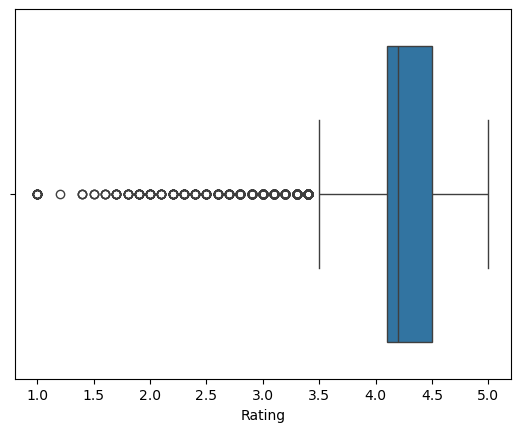

In [352]:
sns.boxplot(data=df,x='Rating');

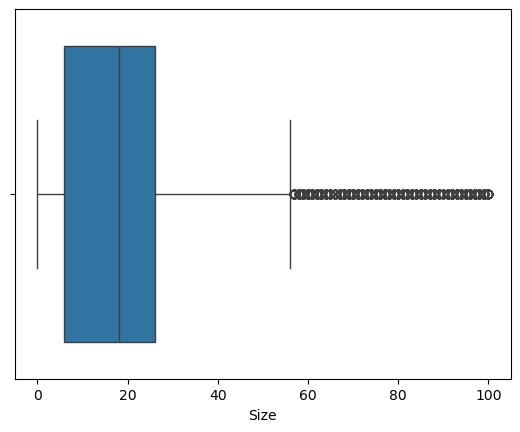

In [354]:
sns.boxplot(data=df,x='Size');

In [356]:
indexs = detect_outliers(df,0,['Rating','Reviews','Size','Price'])
# df.drop(indexs,axis=0,inplace=True)

In [357]:
outliers_data = df.loc[indexs]
clean_data = df.drop(indexs,axis=0)

## Some Visualizations After Removing Outliers

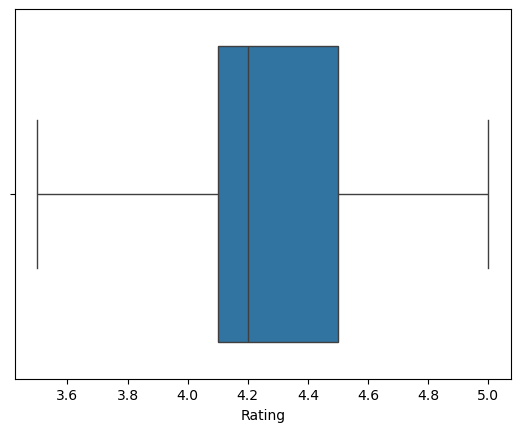

In [358]:
sns.boxplot(data=clean_data,x='Rating');

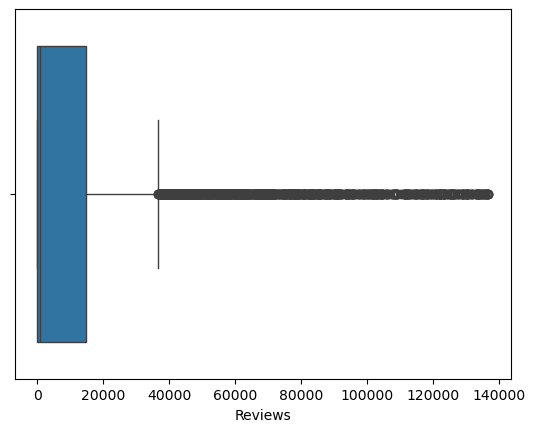

In [359]:
sns.boxplot(data=clean_data,x='Reviews');

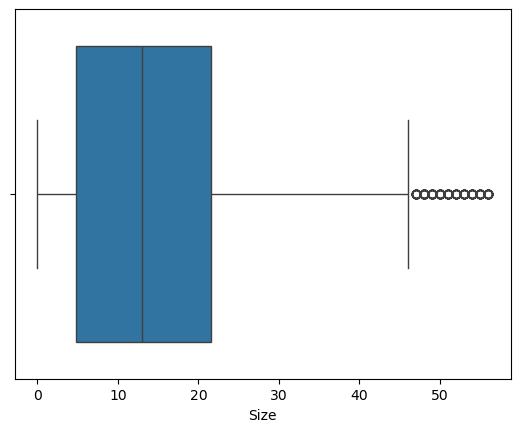

In [360]:
sns.boxplot(data=clean_data,x='Size');

In [361]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",4.0
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",4.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,"July 6, 2018",4.0
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.5,"1,000+",Free,0.0,Everyone,"January 20, 2017",2.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,21.516165,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",3.73702


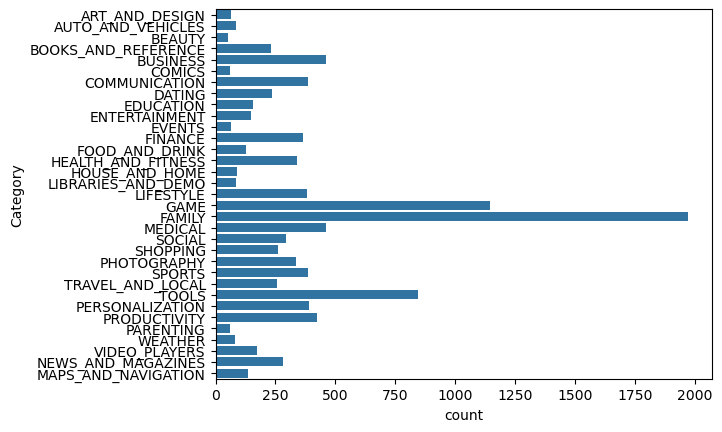

In [362]:
sns.countplot(data=df,y='Category');

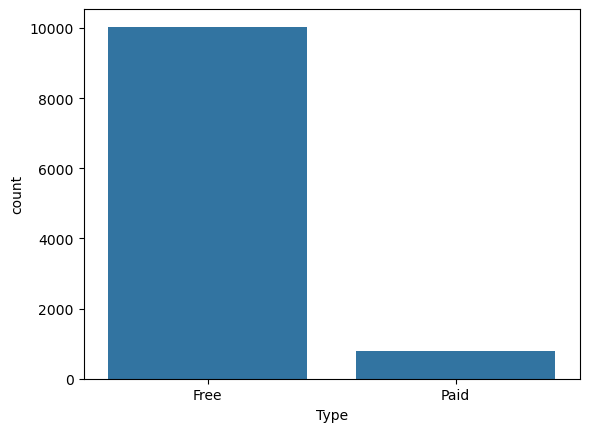

In [363]:
sns.countplot(data=df,x='Type');

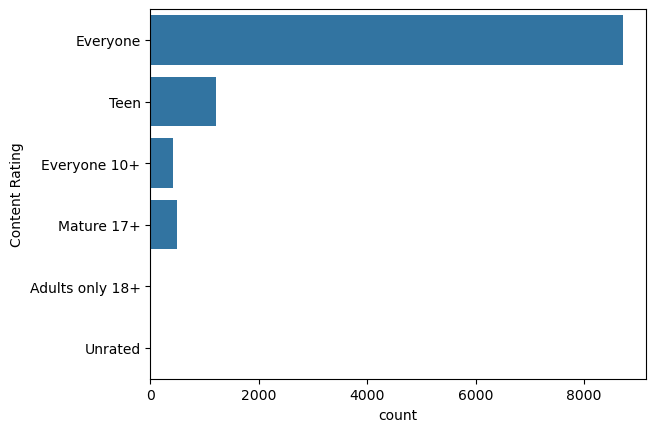

In [364]:
sns.countplot(data=df,y='Content Rating');

[None, None, None, None, None, None]

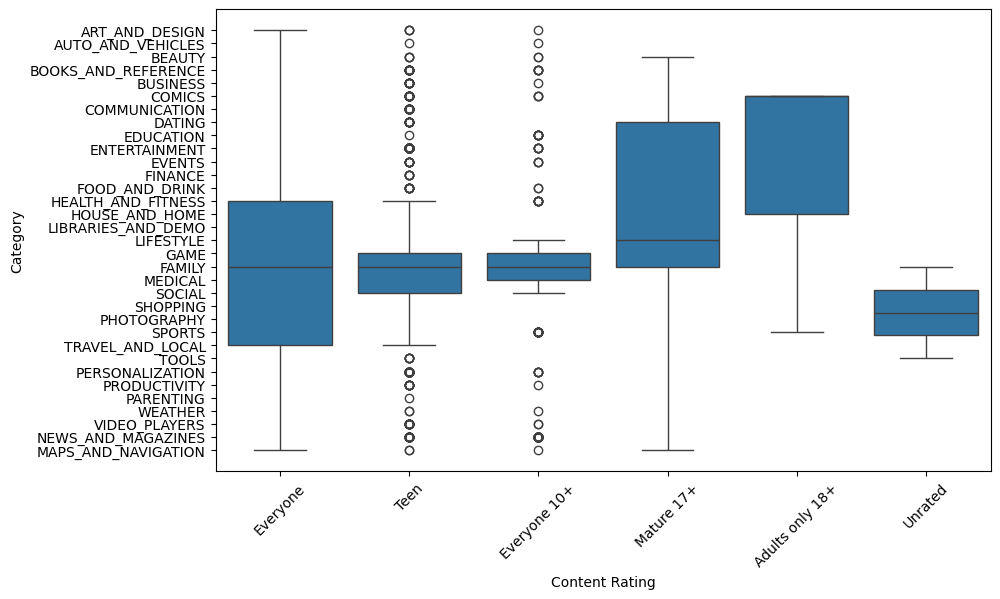

In [365]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df,y='Category',x='Content Rating')
plt.setp(ax.get_xticklabels(), rotation=45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

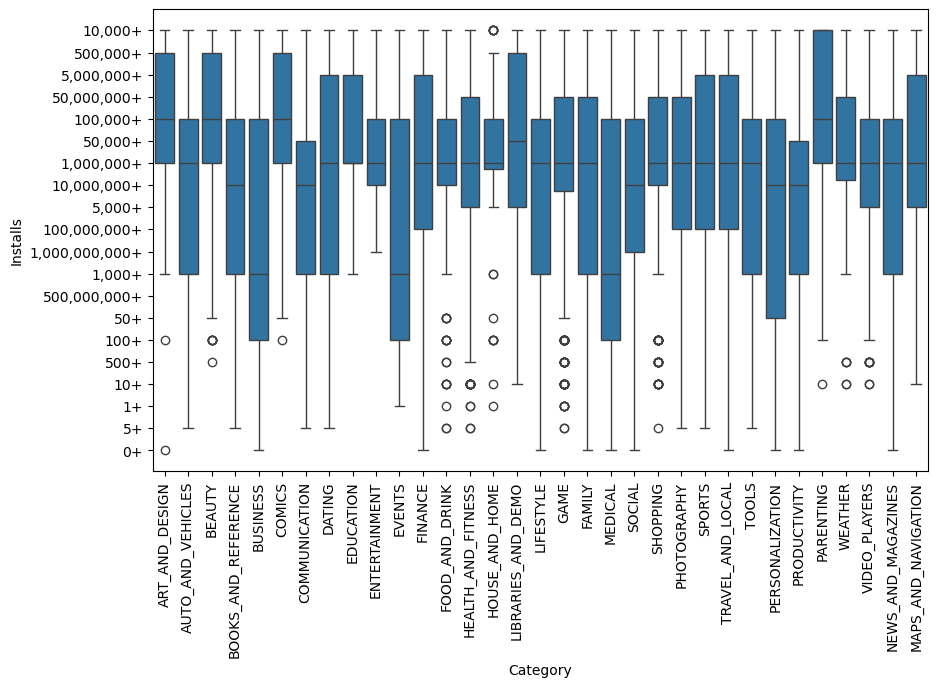

In [366]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df,x='Category',y='Installs')
plt.setp(ax.get_xticklabels(), rotation=90)

[None, None, None, None, None, None]

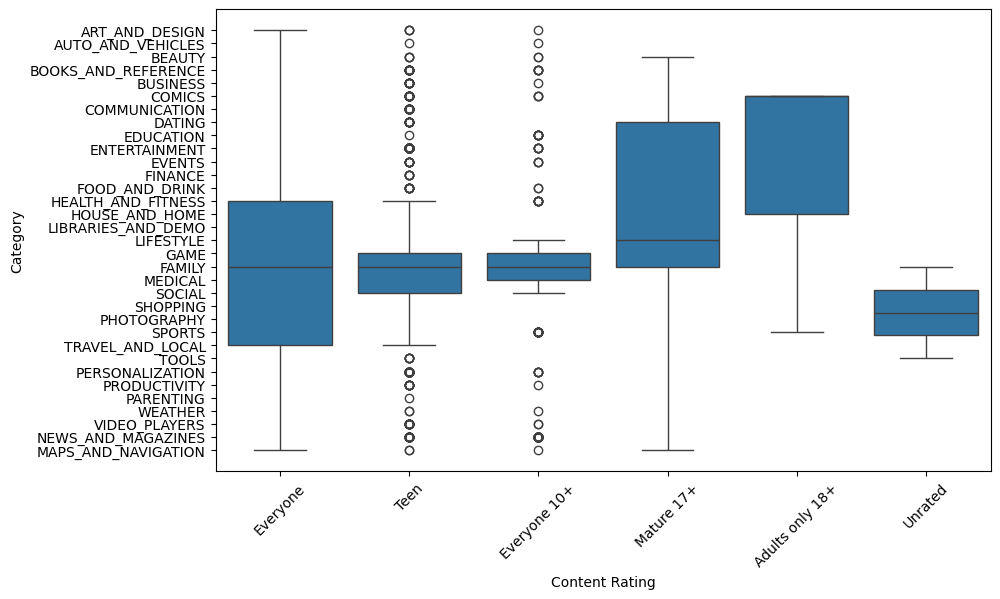

In [367]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df,y='Category',x='Content Rating')
plt.setp(ax.get_xticklabels(), rotation=45)

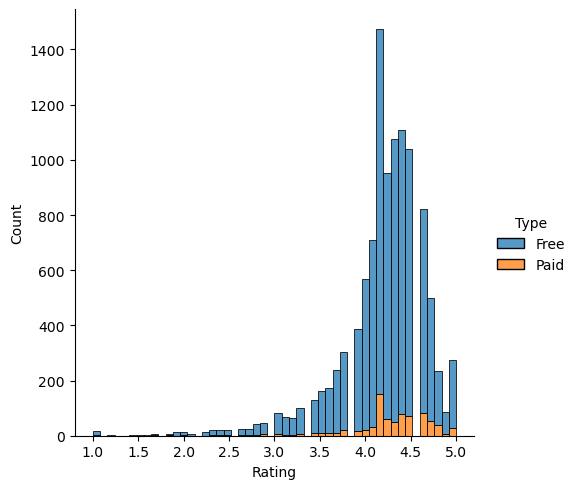

In [368]:
colors = sns.color_palette()
sns.displot(data=df,x='Rating',hue='Type',bins=50,color=colors[:2],multiple='stack')
plt.show()

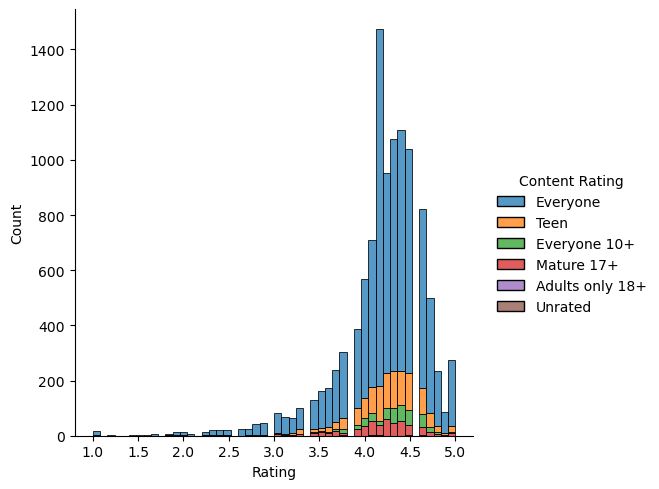

In [369]:
colors = sns.color_palette()
sns.displot(data=df,x='Rating',hue='Content Rating',bins=50,color=colors[:2],multiple='stack')
plt.show()

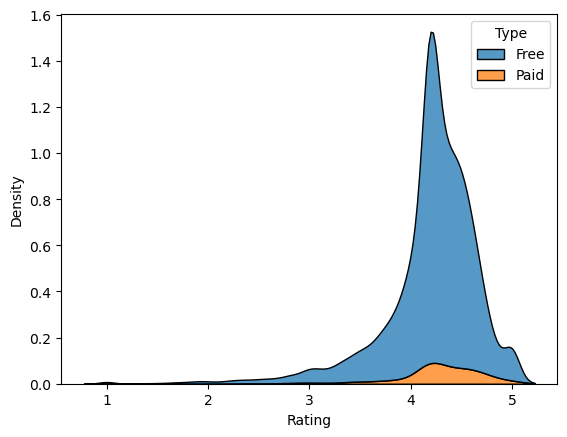

In [370]:
colors = sns.color_palette()
sns.kdeplot(data=df,x='Rating',hue='Type',color=colors[:2],multiple='stack')
plt.show()

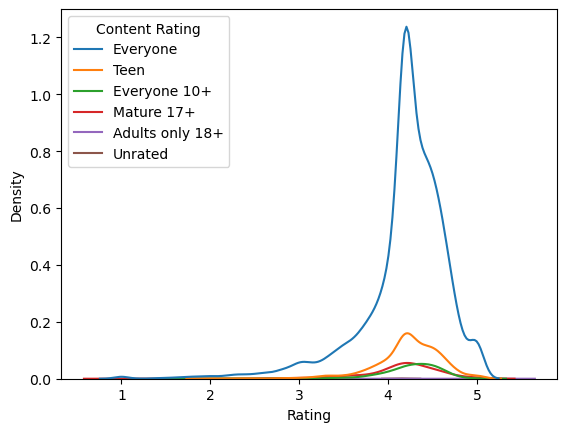

In [371]:
colors = sns.color_palette()
sns.kdeplot(data=df,x='Rating',hue='Content Rating',color=colors[:2])
plt.show()

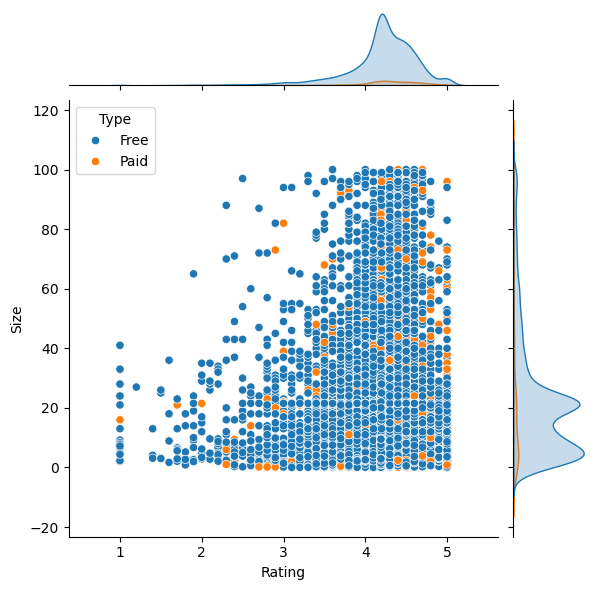

In [372]:
sns.jointplot(data=df,x='Rating',y='Size',hue='Type')
plt.show()

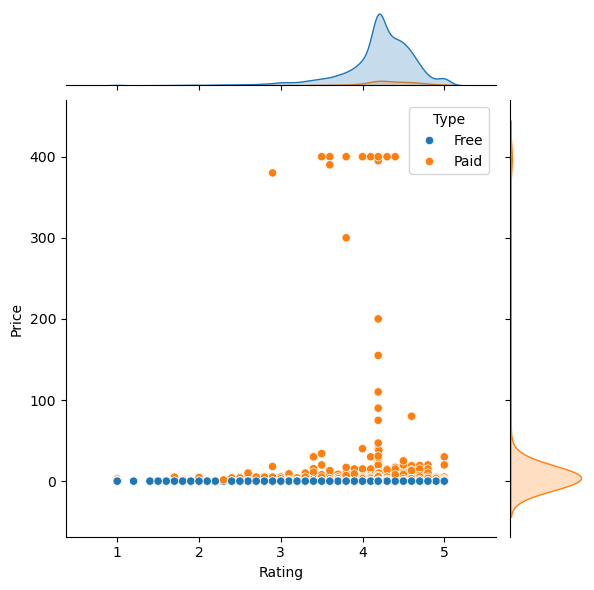

In [373]:
sns.jointplot(data=df,x='Rating',y='Price',hue='Type')
plt.show()

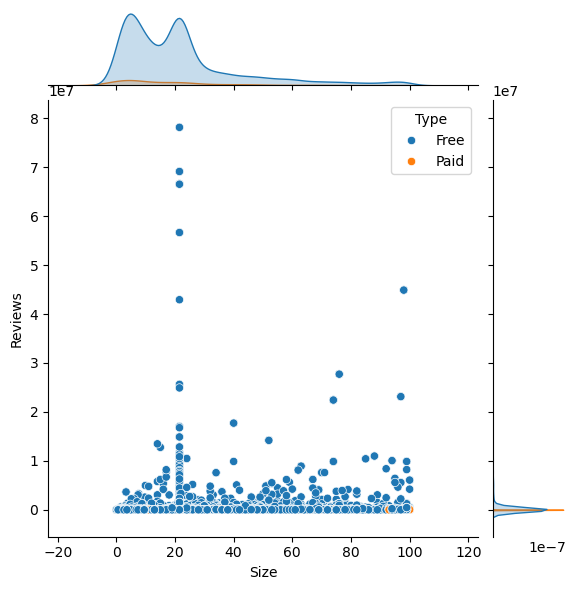

In [374]:
## We note that paid applications have the lowest number of views
sns.jointplot(data=df,y='Reviews',x='Size',hue='Type')
plt.show()

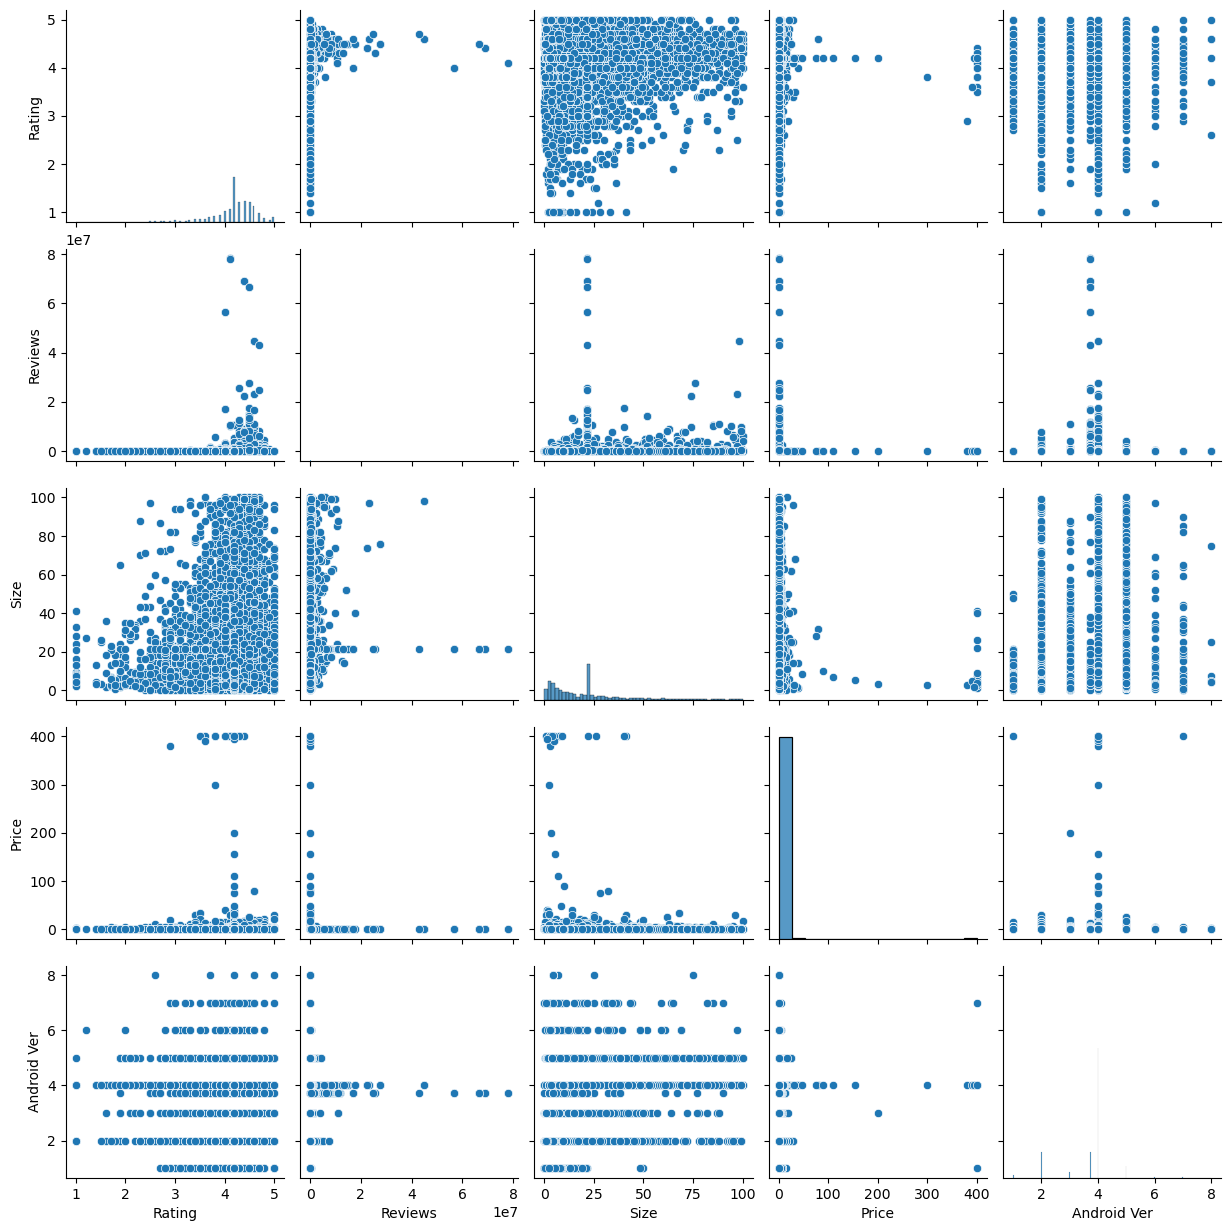

In [522]:
sns.pairplot(df)
plt.show()

In [385]:
df['Rating'] = df['Rating'].astype('float64')
df['Reviews'] = df['Reviews'].astype('float64')
df['Size'] = df['Size'].astype('float64')
df['Android Ver'] = df['Android Ver'].astype('float64')
df['Price'] = df['Price'].astype('float64')
numerical_features = ['Rating','Reviews','Size','Android Ver','Price']

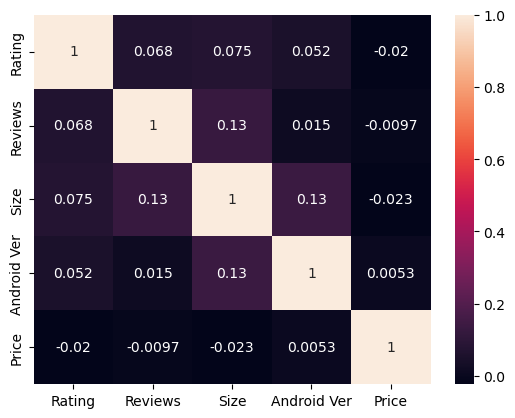

In [391]:
correlation = df[numerical_features].corr()
sns.heatmap(correlation,annot=True)
plt.show()

## Some Questions
    1 - What is the most expensive app on the store?
    2 - What is the average size of the free apps & paid apps?
    3 - What is the 5 top rated apps?
    4 - How many apps that has more than 50K reviews?
    5 - How many apps have rating > 4.7 and what is thier avg price?
    6 - How much google earned from the 5,000,000+ installed apps?
    7 - What is the max and min size for free and paid apps?
    8 - Is there a correlation between rating, Reviews, Size with the price of the app?
    9 - Which Genre has more apps?
    10 - How many apps that can work on android version 4?
    11 - How many apps for each type for each content rating?

### 1 - What is the most expensive app on the store?

In [397]:
df[df['Price'] == df['Price'].max()]['App'].iloc[0]

"I'm Rich - Trump Edition"

### 2 - What is the average size of the free apps & paid apps?

In [487]:
df.groupby('Type').describe()['Size']['mean']

Type
Free    21.675521
Paid    19.516453
Name: mean, dtype: float64

### 3 - What is the 5 top rated apps?

In [419]:
df['Rating'].sort_values(ascending=False)[:5]

2427    5.0
8234    5.0
9301    5.0
6375    5.0
6372    5.0
Name: Rating, dtype: float64

### 4 - How many apps that has more than 50K reviews?

In [520]:
# df[ df['Reviews'] > 50000 ]
df[ df['Reviews'] > 50000 ].shape[0]

2782

### 5 - How many apps have rating > 4.7 and what is thier avg price?

In [498]:
# df[df['Rating'] > 4.7]
df[df['Rating'] > 4.7]['Price'].mean()

0.5018487394957983

### 6 - How much google earned from the 5,000,000+ installed apps?

In [444]:
df[df['Installs'] == '5,000,000+']['Price'].sum()

0.0

### 7 - What is the max and min size for free and paid apps?

In [482]:
df.groupby('Type').describe()['Size'][['min','max']]

,min,max
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


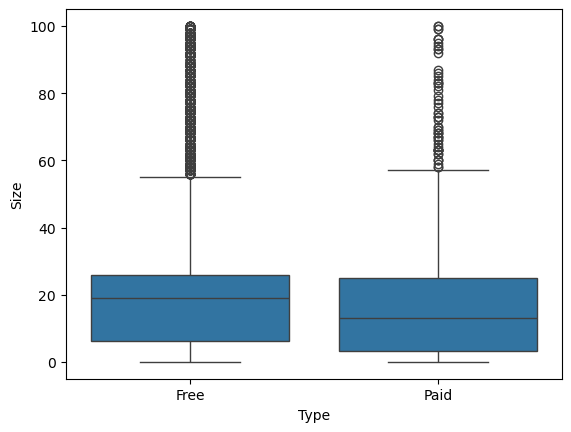

In [503]:
sns.boxplot(data = df,x='Type',y='Size')
plt.show()

### 8 - Is there a correlation between rating, Reviews, Size with the price of the app?

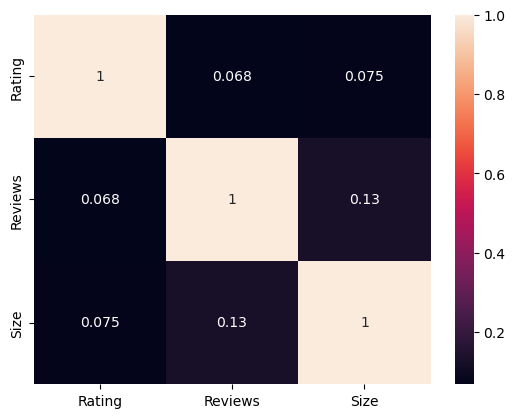

In [454]:
corr = df[['Rating','Reviews','Size']].corr()
sns.heatmap(corr,annot=True)
plt.show()

### 9 - Which Genre has more apps?

In [480]:
df['Category'].value_counts()

Category
FAMILY                 1971
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

### 10 - How many apps that can work on android version 4?

In [515]:
df[ df['Android Ver'] == 4.0 ].shape[0]
df['Android Ver'].value_counts()

Android Ver
4.00000    6959
3.73702    1363
2.00000    1351
5.00000     629
3.00000     287
1.00000     138
6.00000      60
7.00000      46
8.00000       6
Name: count, dtype: int64

## 11 - How many apps for each type for each content rating?

In [514]:
pd.pivot_table(index='Type',columns='Content Rating',data=df,aggfunc='count')['Rating']

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,8019.0,380.0,479.0,1156.0,2.0
Paid,NaN,695.0,33.0,20.0,52.0,NaN


## Thank you for your interest and reaching to this point